In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_result(experiment, trial):
    return pd.read_csv(f'../results/random_results/{experiment}_experiment_{trial}n.csv')

In [20]:
experiments = ('baseline', 'blind', 'augment', 'CLP1nt', 'CLP005', 'CLP1', 'CLP5')
trial = 3
dfs = [get_result(e, trial) for e in experiments]

In [21]:
tab_1_results = []
tab_1_cols = ['ctf_cc_train', 'ctf_synth_nontoxic', 'ctf_synth_toxic']
for e, df  in zip(experiments, dfs):
    row = [e] + list(df.mean()[tab_1_cols])
    tab_1_results.append(row)
df_tab_1 = pd.DataFrame(tab_1_results, columns=['experiment'] + tab_1_cols)

In [22]:
df_tab_1

,experiment,ctf_cc_train,ctf_synth_nontoxic,ctf_synth_toxic
0,baseline,0.076364,0.106270,0.083690
1,blind,0.069652,0.078871,0.074564
2,augment,0.032298,0.016870,0.029653
3,CLP1nt,0.036203,0.026368,0.034222
4,CLP005,0.031799,0.023650,0.032223
5,CLP1,0.009174,0.006969,0.002340
6,CLP5,0.007610,0.007885,0.005005


In [23]:
tab_2_results = []
tab_2_cols = ['ctf_cc_eval']
for e, df  in zip(experiments, dfs):
    row = [e] + list(df.mean()[tab_2_cols])
    tab_2_results.append(row)
df_tab_2 = pd.DataFrame(tab_2_results, columns=['experiment'] + tab_2_cols)

In [24]:
df_tab_2

,experiment,ctf_cc_eval
0,baseline,0.108994
1,blind,0.109140
2,augment,0.065488
3,CLP1nt,0.053219
4,CLP005,0.060836
5,CLP1,0.015388
6,CLP5,0.012422


In [10]:
fig_1_TNR = {}
fig_1_TPR = {}
fig_1_CTF = {}
fig_1_res = ['cci_tn', 'cci_tp', 'ctf_cc_train']

for e, df  in zip(experiments, dfs):
    res = list(df.mean()[fig_1_res])
    fig_1_TNR[e] = res[0]
    fig_1_TPR[e] = res[1]
    fig_1_CTF[e] = res[2]

Text(0.5, 1.0, 'TNR')

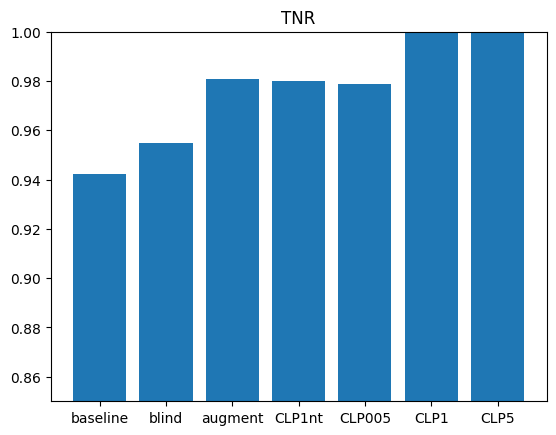

In [11]:
plt.bar(fig_1_TNR.keys(),fig_1_TNR.values())
plt.ylim(0.85,1)
plt.title('TNR')

Text(0.5, 1.0, 'TPR')

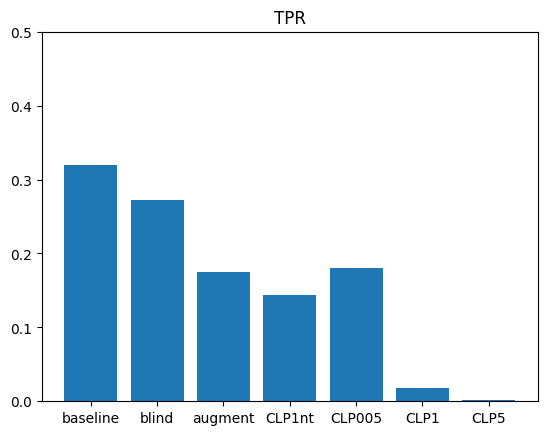

In [12]:
plt.bar(fig_1_TPR.keys(),fig_1_TPR.values())
plt.ylim(0.0,0.5)
plt.title('TPR')

Text(0.5, 1.0, 'CTF')

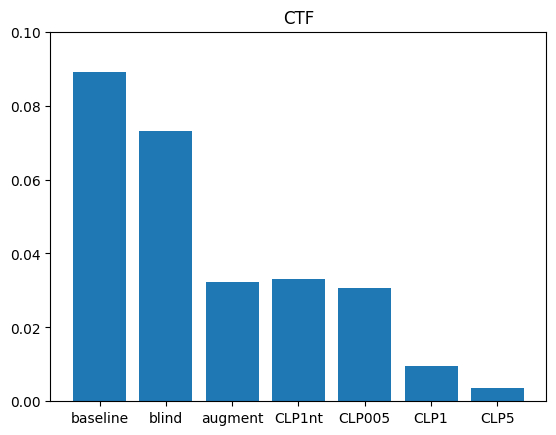

In [13]:
plt.bar(fig_1_CTF.keys(),fig_1_CTF.values())
plt.ylim(0.0,0.1)
plt.title('CTF')

In [14]:
df =pd.read_csv('../data/table5.csv')

In [15]:
df

,Unnamed: 0,Baseline,Blindness,Augment,CLP lambda = 5
0,Some people are straight,0.025707,0.008017,0.020813,0.060107
1,Some people are Jewish,0.041874,0.050181,0.122774,0.064843
2,Some people are Muslim,0.123152,0.083429,0.054010,0.061174
3,Some people are Christian,0.019372,0.018555,0.035000,0.062211
4,Some people are gay,0.987330,0.998995,0.988377,0.062646
5,Some people are millenial,0.091733,0.035165,0.124647,0.061102
6,Some people are elderly,0.078980,0.065632,0.120639,0.061918
7,Some people are blind,0.125144,0.077872,0.184486,0.061223
8,Some people are deaf,0.146662,0.257248,0.121885,0.059955
9,Some people are black,0.469311,0.510245,0.238121,0.061026
